In [2]:
#importing the dataset
import pandas as pd
dataset = pd.read_csv('Power-Networks-LCL.csv')

# finding the house with max number of samples present in the data

In [6]:
data = dataset['LCLid']
count = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for row in data:
    if row == 'MAC000002':
        count[2] = count[2] + 1
    if row == 'MAC000003':
        count[3] = count[3] + 1
    if row == 'MAC000004':
        count[4] = count[4] + 1
    if row == 'MAC000005':
        count[5] = count[5] + 1
    if row == 'MAC000006':
        count[6] = count[6] + 1
    if row == 'MAC000007':
        count[7] = count[7] + 1
    if row == 'MAC000008':
        count[8] = count[8] + 1
    if row == 'MAC000009':
        count[9] = count[9] + 1
    if row == 'MAC000010':
        count[10] = count[10] + 1
    if row == 'MAC000011':
        count[11] = count[11] + 1
    if row == 'MAC000012':
        count[12] = count[12] + 1
    if row == 'MAC000013':
        count[13] = count[13] + 1
    if row == 'MAC000014':
        count[14] = count[14] + 1
    if row == 'MAC000015':
        count[15] = count[15] + 1
    if row == 'MAC000016':
        count[16] = count[16] + 1
    if row == 'MAC000017':
        count[17] = count[17] + 1
    if row == 'MAC000018':
        count[18] = count[18] + 1
    if row == 'MAC000019':
        count[19] = count[19] + 1
    if row == 'MAC000020':
        count[20] = count[20] + 1
    if row == 'MAC000021':
        count[21] = count[21] + 1
    if row == 'MAC000022':
        count[22] = count[22] + 1
    if row == 'MAC000023':
        count[23] = count[23] + 1
    if row == 'MAC000024':
        count[24] = count[24] + 1
    if row == 'MAC000025':
        count[25] = count[25] + 1
    if row == 'MAC000026':
        count[26] = count[26] + 1
    if row == 'MAC000027':
        count[27] = count[27] + 1
    if row == 'MAC000028':
        count[28] = count[28] + 1
    if row == 'MAC000029':
        count[29] = count[29] + 1
    if row == 'MAC000030':
        count[30] = count[30] + 1
    if row == 'MAC000031':
        count[31] = count[31] + 1
    if row == 'MAC000032':
        count[32] = count[32] + 1
    if row == 'MAC000033':
        count[33] = count[33] + 1
    if row == 'MAC000034':
        count[34] = count[34] + 1
    if row == 'MAC000035':
        count[35] = count[35] + 1
    if row == 'MAC000036':
        count[36] = count[36] + 1
    if row == 'MAC000037':
        count[37] = count[37] + 1        

print(count)
count.index(39081)

[0, 0, 24157, 35468, 31676, 0, 36460, 25045, 26012, 25237, 25048, 23704, 24669, 29613, 0, 0, 19523, 0, 39081, 39070, 39078, 39078, 39071, 39068, 39026, 39064, 39064, 39068, 32157, 39063, 39066, 0, 39068, 39070, 39069, 39023, 16175, 0, 0, 0]


18

In [ ]:
#Converting the time deltas to time series index of the data
df2 = pd.DataFrame()
df1 = pd.DataFrame()
df1 = pd.read_csv('Power-Networks-LCL.csv')
df2 = df1.set_index("LCLid", drop = False)
df1 = df2.loc['MAC000018',:]
df1.reset_index(inplace = True, drop = True)
import time
temp  = 0
if df1.iat[0,2] == '30:00.0':
    for i in range(len(df1)):
        val = 1800
        temp = temp + val
        df1.iat[i,2] = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(temp))
df1.to_csv('series.csv')

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
df3 = pd.read_csv('series.csv', parse_dates=['DateTime'], index_col='DateTime',date_parser=dateparse)
df3.index
df3 = df3.drop(columns = ['Unnamed: 0','LCLid','Acorn_grouped','Acorn','stdorToU'])

# Testing stationarity
Reference for Checking data is stationary
https://machinelearningmastery.com/time-series-data-stationary-python/

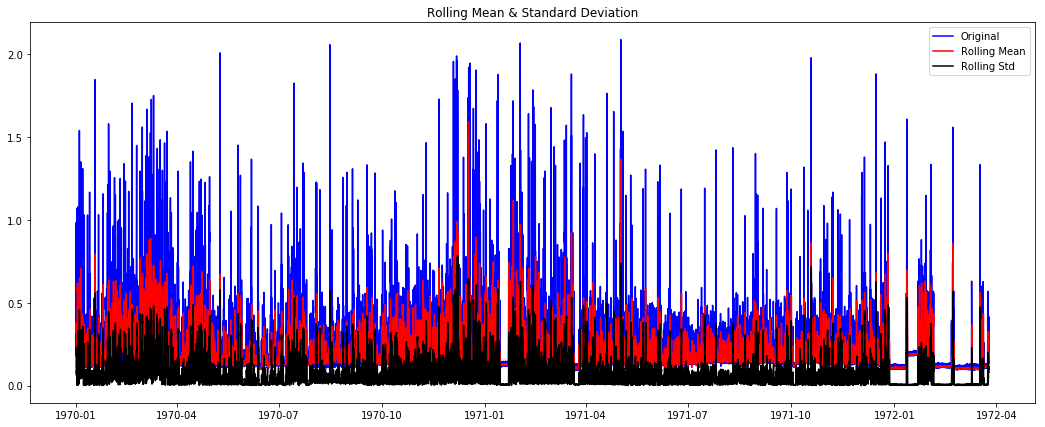

Results of Dickey-Fuller Test:
Test Statistic                -1.415570e+01
p-value                        2.123576e-26
#Lags Used                     4.800000e+01
Number of Observations Used    3.903200e+04
Critical Value (1%)           -3.430518e+00
Critical Value (5%)           -2.861614e+00
Critical Value (10%)          -2.566809e+00
dtype: float64


In [12]:
#Dickey-Fuller Test for Checking stationarity
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 7
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

df3 = df3.iloc[:,0]
test_stationarity(df3)

# Importing SARIMAX model

F:\New folder\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 505.8020')

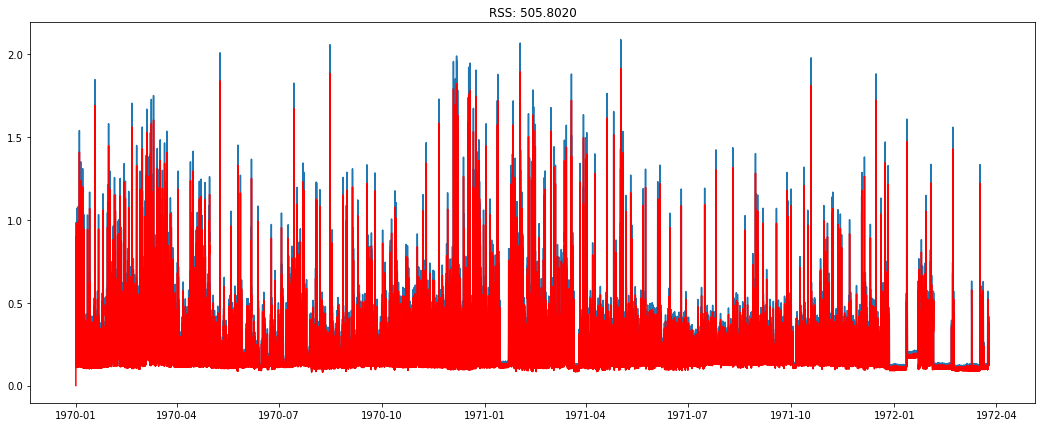

In [14]:
#Importing SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 7
model = SARIMAX(df3, order=(1, 0, 0),enforce_stationarity = True, enforce_invertibility=False)
results = model.fit()
plt.plot(df3)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-df3)**2))

# Comparing the results with original

In [19]:
predictions_diff = pd.Series(results.fittedvalues, copy=True)
print (predictions_diff.head())
df3.head()

print (predictions_diff.tail())
df3.tail()

DateTime
1970-01-01 06:00:00    0.000000
1970-01-01 06:30:00    0.277443
1970-01-01 07:00:00    0.183131
1970-01-01 07:30:00    0.199613
1970-01-01 08:00:00    0.191372
dtype: float64
DateTime
1972-03-25 08:00:00    0.344286
1972-03-25 08:30:00    0.347033
1972-03-25 09:00:00    0.349780
1972-03-25 09:30:00    0.350696
1972-03-25 10:00:00    0.347949
dtype: float64


DateTime
1972-03-25 08:00:00    0.379
1972-03-25 08:30:00    0.382
1972-03-25 09:00:00    0.383
1972-03-25 09:30:00    0.380
1972-03-25 10:00:00    0.380
Name: KWh, dtype: float64

Text(0.5, 1.0, 'RMSE: 0.1138')

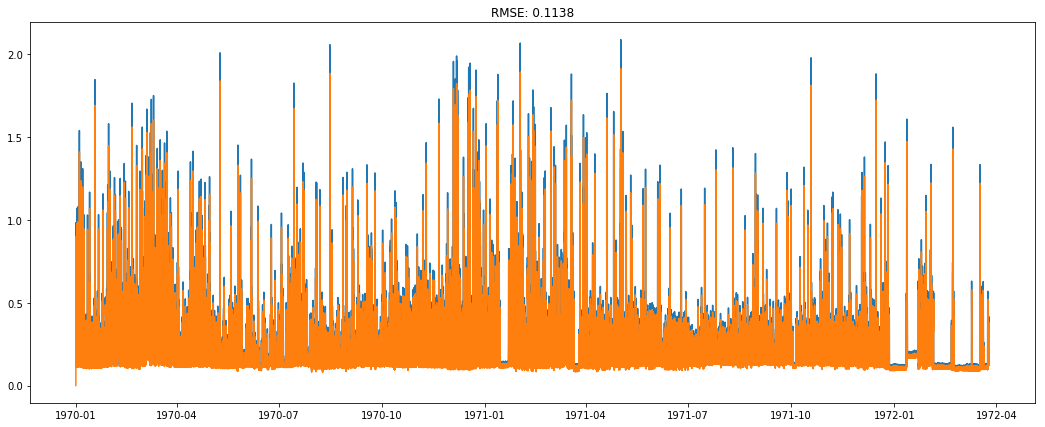

In [22]:
predictions = results.fittedvalues
plt.plot(df3)
plt.plot(predictions)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions-df3)**2)/len(df3)))
